In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 22 14:16:05 2017

@author: user
"""

#%matplotlib inline
import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
#import matplotlib

# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/user/.spyder-py3/features.csv', low_memory=False)


relevant_features = [  
    "UUID",
    "Touch_Pressure",
    "Touch_Size",
    "X_Coordinate",
    "Y_Coordinate",
    "X_Precision",
    "Y_Precision",
    "Action_Timestamp",
]
# replace the data with a subset containing only the relevant features
#data = data[relevant_features]

# normalise the data - this leads to better accuracy and reduces numerical instability in
# the SVM implementation
#data = np.array(data)
#label = data[:,0]
#data = data[:, [1,2,3,4,5,6,7]] / data[:, [1,2,3,4,5,6,7]].max(axis=0)
#data = np.column_stack((label,data))
#data= pd.DataFrame(data)
#data.columns =relevant_features


#df1=pd.DataFrame(relevant_features).transpose()
#print (df1)

#frames=[df1,data]
#data=pd.concat(frames)
#print(data)

#from sklearn.preprocessing import normalize
#data = normalize(data[:, [1,7]], axis=0)
# class 1 (normal) and class -1 (illegi)
print(type(data['UUID']))
data.loc[data['UUID'] == "HJCQK1502588851814", "attack"] = 1 
data.loc[data['UUID'] != "HJCQK1502588851814", "attack"] = -1
#print(data.info())

                 #print("data loc value",data['label'] != "normal.")

# grab out the attack value as the target for training and testing. since we're
# only selecting a single column from the `data` dataframe, we'll just get a
# series, not a new dataframe
target = data["attack"]
# find the proportion of outliers we expect (aka where `illegi == -1`). because 
# target is a series, we just compare against itself rather than a column.
outliers = target[target == -1]  

print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

data.drop(["UUID", "attack"], axis=1, inplace=True)
data.drop(["Language", "Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Country_Code"], axis=1, inplace=True)

data.shape
indices = np.arange(data.shape[0])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
#print(data)
from sklearn.model_selection import train_test_split  

train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8,random_state=0)  
train_data.shape
from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
nu = outliers.shape[0] / target.shape[0]  
print("nu", nu)

model = svm.OneClassSVM(nu=0.99, kernel='rbf', gamma='auto')  
model.fit(train_data) 

from sklearn import metrics  
preds = model.predict(train_data)  
targs = train_target


print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

preds = model.predict(test_data)  
targs = test_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


<class 'pandas.core.series.Series'>
outliers.shape (830,)
outlier fraction 0.9880952380952381
nu 0.9880952380952381
accuracy:  0.979166666667
precision:  0.0
recall:  0.0
f1:  0.0
area under curve (auc):  0.494736842105
accuracy:  0.97619047619
precision:  0.0
recall:  0.0
f1:  0.0
area under curve (auc):  0.49696969697


In [36]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/user/.spyder-py3/loopdata.csv', low_memory=False)


relevant_features = [  
    "UUID",
    "Touch_Pressure",
    "Touch_Size",
    "X_Coordinate",
    "Y_Coordinate",
    "X_Precision",
    "Y_Precision",
    "Action_Timestamp",
]
# replace the data with a subset containing only the relevant features
data = data[relevant_features]

data["Touch_Pressure"] = np.log((data["Touch_Pressure"] + 0.1).astype(float))  
data["Touch_Size"] = np.log((data["Touch_Size"] + 0.1).astype(float))  
data["X_Coordinate"] = np.log((data["X_Coordinate"] + 0.1).astype(float))
data["Y_Coordinate"] = np.log((data["Y_Coordinate"] + 0.1).astype(float)) 
data["X_Precision"] = np.log((data["X_Precision"] + 0.1).astype(float)) 
data["Y_Precision"] = np.log((data["Y_Precision"] + 0.1).astype(float)) 
data["Action_Timestamp"] = np.log(((data["Y_Precision"]*0.0000001) + 0.1).astype(float))

print(data['UUID'].unique())

data.loc[data['UUID'] == "AEVXC1499703691514", "attack"] = 1  
data.loc[data['UUID'] != "AEVXC1499703691514", "attack"] = -1

target = data['attack']
# find the proportion of outliers we expect (aka where `attack == -1`). because 
# target is a series, we just compare against itself rather than a column.
outliers = target[target == -1]  

print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

data.drop(["UUID", "attack"], axis=1, inplace=True)
# check the shape for sanity checking.
data.shape
print(data.info())

from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8)  
train_data.shape

from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
nu = outliers.shape[0] / target.shape[0]  
print("nu", nu)

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma='auto')  
model.fit(train_data) 

from sklearn import metrics  
preds = model.predict(train_data)  
targs = train_target


print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

preds = model.predict(test_data)  
targs = test_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

['AEVXC1499703691514' 'NQVRW1500425270562' 'FFKQX1500469787961'
 'UBCNF1500568060429' 'LDGTO1500578773229']
outliers.shape (821,)
outlier fraction 0.9480369515011547
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 7 columns):
Touch_Pressure      866 non-null float64
Touch_Size          866 non-null float64
X_Coordinate        866 non-null float64
Y_Coordinate        866 non-null float64
X_Precision         866 non-null float64
Y_Precision         866 non-null float64
Action_Timestamp    866 non-null float64
dtypes: float64(7)
memory usage: 47.4 KB
None
nu 0.9480369515011547
accuracy:  0.916184971098
precision:  0.138888888889
recall:  0.15625
f1:  0.147058823529
area under curve (auc):  0.554640151515
accuracy:  0.890804597701
precision:  0.2
recall:  0.153846153846
f1:  0.173913043478
area under curve (auc):  0.552078356426


['AEVXC1499703691514' 'NQVRW1500425270562' 'FFKQX1500469787961'
 'UBCNF1500568060429' 'LDGTO1500578773229']
(114, 241) (114, 241)
0.922190201729
0.953890489914
0.953890489914
0.953890489914
0.951008645533
0.953890489914
0.948126801153
0.953890489914
0.953890489914


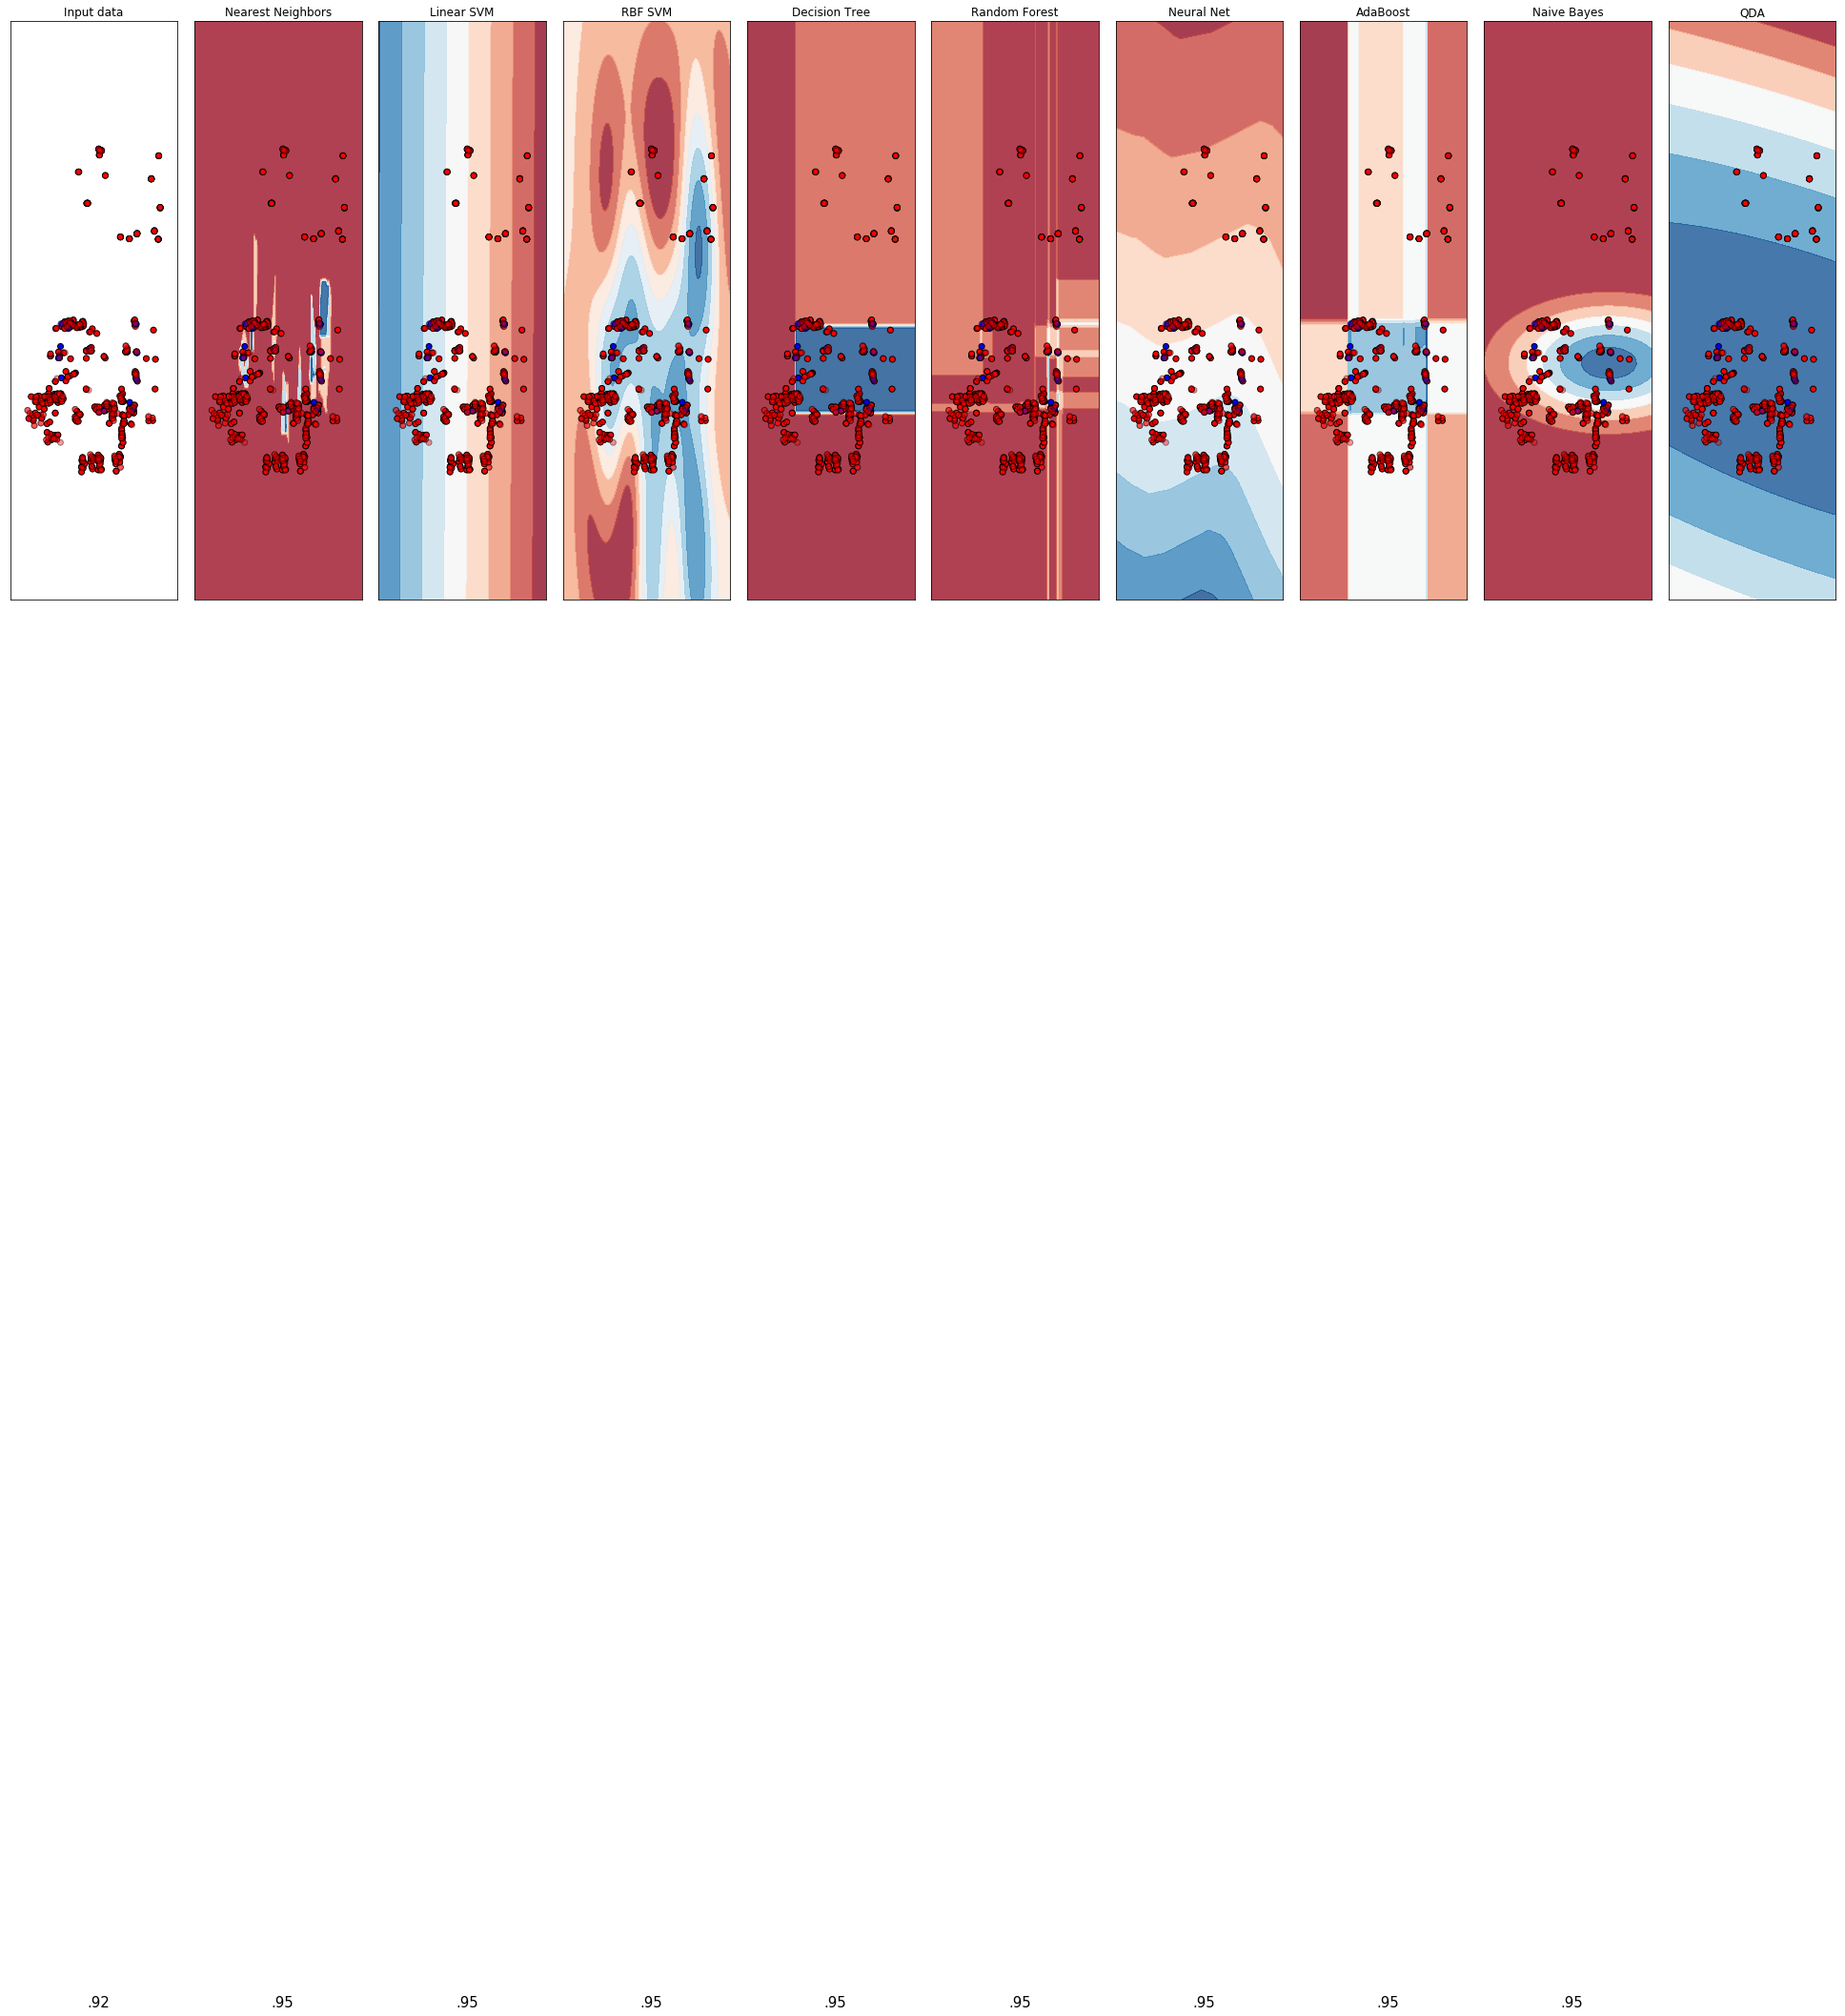

In [207]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/user/.spyder-py3/loopdata.csv', low_memory=False)


relevant_features = [  
    "UUID",
    "X_Coordinate",
    "Y_Coordinate",
]

# replace the data with a subset containing only the relevant features
data = data[relevant_features]

#data["Touch_Pressure"] = np.log((data["Touch_Pressure"] + 0.1).astype(float))  
#data["Touch_Size"] = np.log((data["Touch_Size"] + 0.1).astype(float))  
data["X_Coordinate"] = np.log((data["X_Coordinate"] + 0.1).astype(float))
data["Y_Coordinate"] = np.log((data["Y_Coordinate"] + 0.1).astype(float)) 
#data["X_Precision"] = np.log((data["X_Precision"] + 0.1).astype(float)) 
#data["Y_Precision"] = np.log((data["Y_Precision"] + 0.1).astype(float)) 
#data["Action_Timestamp"] = np.log(((data["Y_Precision"]*0.0000001) + 0.1).astype(float))

print(data['UUID'].unique())

data.loc[data['UUID'] == "AEVXC1499703691514", "attack"] = 1  
data.loc[data['UUID'] != "AEVXC1499703691514", "attack"] = -1

target = data['attack']
data.drop(["UUID", "attack"], axis=1, inplace=True)

XYdata=(data,target)
datasets=[XYdata]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    #X, y = ds
    #X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.4, random_state=42)

    X=np.array(data)
    X_train = np.array(X_train)
    X_test = np.array(X_test)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    print(xx.shape,yy.shape)
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #print(len(datasets), len(classifiers))
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        score = clf.score(X_test, y_test)
        print(score)
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            #Z = clf.decision_function(X_test)
        #else:
            #Z = clf.predict_proba(X_test)
        #print(X_test.shape)
            # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        #print(Z.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
            # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(.4, .4, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
        i+=1
plt.tight_layout()
plt.show()

(285, 248) (285, 248)
(70680,)
(70680,)
(70680,)
(70680,)
(70680,)
(70680,)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


(70680,)
(70680,)
(70680,)
(70680,)


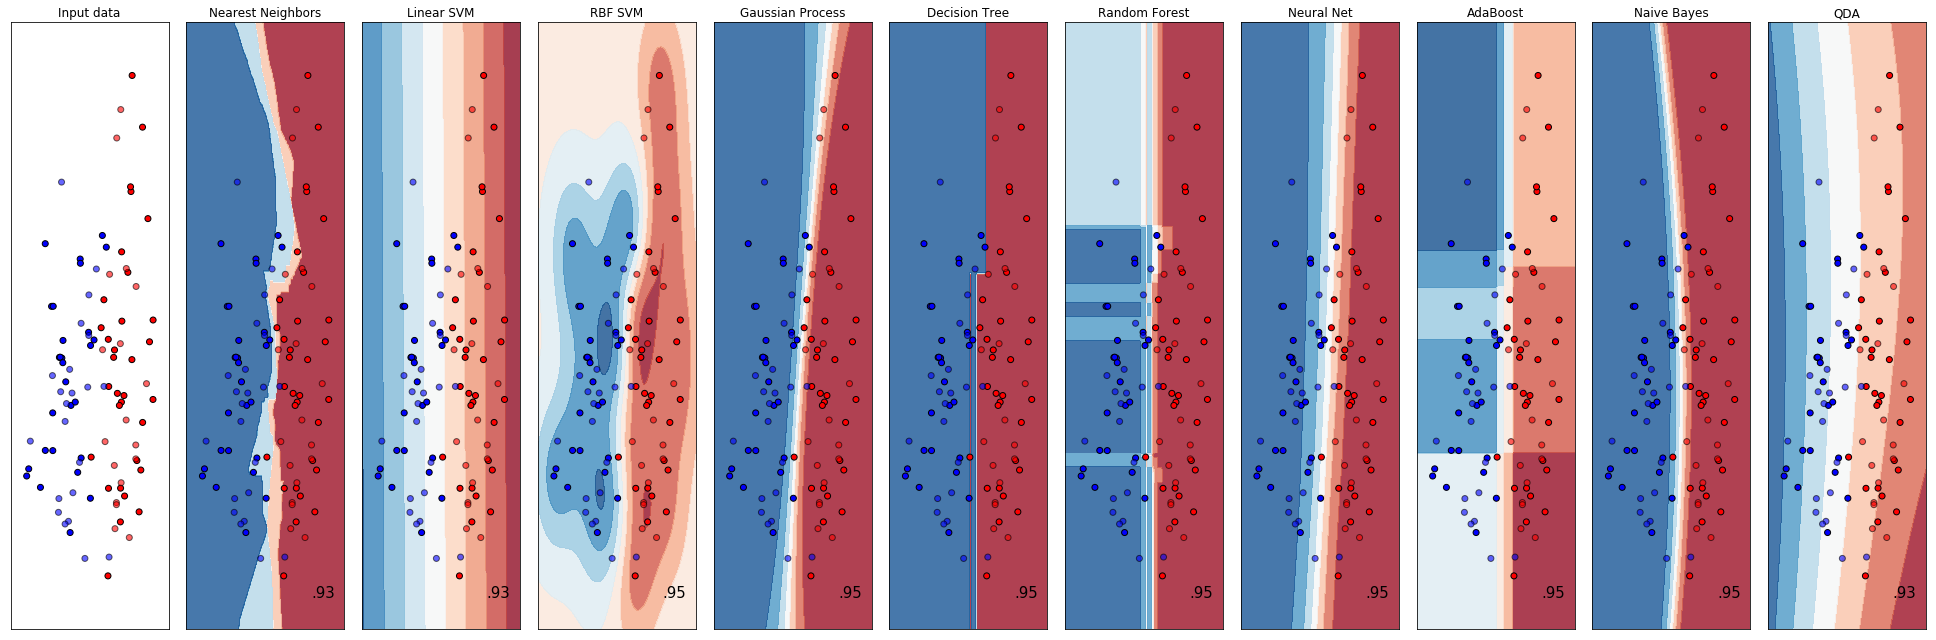

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print(xx.shape,yy.shape)
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        print(Z.shape)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        #print(Z)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()